In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq

cycle1 = {1: tq.Gate.h}
cycle2 = {2: tq.Gate.h}
cycle12 = {(1, 2): tq.Gate.cz}

# Generate a circuit collection to run IRB on the above cycles with 30 random circuits
# for each circuit length in [4, 32, 64]:
n_random_cycles = [4, 32, 64]
circuits = tq.make_irb(cycle1, n_random_cycles)
circuits += tq.make_irb(cycle2, n_random_cycles)
circuits += tq.make_irb(cycle12, n_random_cycles)
len(circuits)

270

In [3]:
circuits += tq.make_srb([1], n_random_cycles)
circuits += tq.make_srb([2], n_random_cycles)
circuits += tq.make_srb([[1, 2]], n_random_cycles)
circuits += tq.make_xrb([1], n_random_cycles)
circuits += tq.make_xrb([2], n_random_cycles)
circuits += tq.make_xrb([[1, 2]], n_random_cycles)

In [4]:
sim = tq.Simulator().add_depolarizing(0.01).add_overrotation(0.04)
sim.run(circuits)

In [5]:
circuits.fit()

EstimateCollection(9)

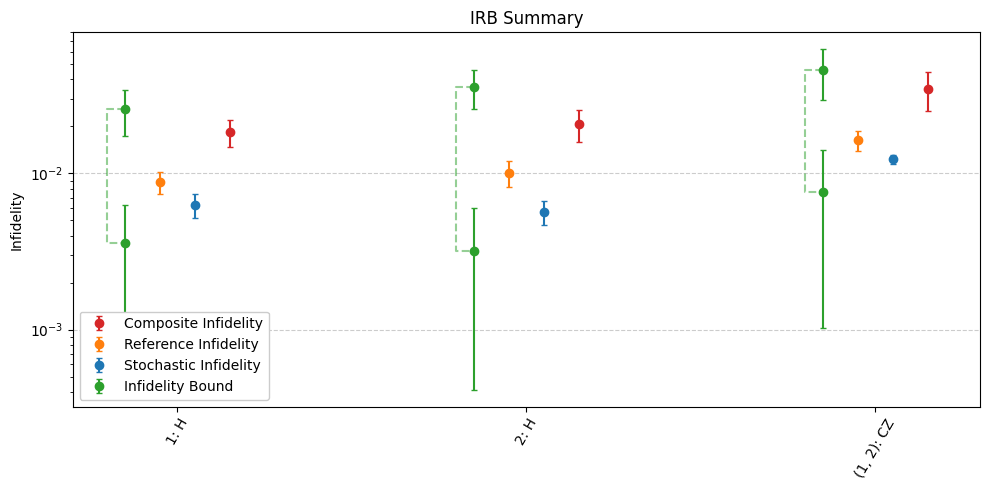

In [6]:
circuits.plot.irb_summary()